
# A. Business Understanding and Data Understanding


## A1. Business Understanding
### Background on Lending Club
LendingClub is an American peer-to-peer lending company, headquartered in San Francisco, California. It is the world's largest peer-to-peer lending platform.

LendingClub enables borrowers to create unsecured personal loans between \\$1,000 and \\$40,000. Investors can search and browse the loan listings on LendingClub website and select loans that they want to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose, with the minimum investment of $25 per note. Investors make money from interest. LendingClub makes money by charging borrowers an origination fee and investors a service fee.

## A2. Data Understanding
The data understanding phase starts with an initial data collection and proceeds with activities in order to get familiar with the data, to identify data quality problems, to discover first insights into the data, or to detect interesting subsets to form hypotheses for hidden information.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#display all dataframe columns in df.head()
pd.options.display.max_columns = None
#display long string in datafame
pd.options.display.max_colwidth = 300

#filter out warning messages
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

import os
for dirname, _, filenames in os.walk('/Users/miu/Data Science/DS Projects/lending_club_loan_portfolio/data/raw'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/miu/Data Science/DS Projects/lending_club_loan_portfolio/data/raw/.DS_Store
/Users/miu/Data Science/DS Projects/lending_club_loan_portfolio/data/raw/.gitkeep
/Users/miu/Data Science/DS Projects/lending_club_loan_portfolio/data/raw/lending_club_2007_2011_6_states.csv
/Users/miu/Data Science/DS Projects/lending_club_loan_portfolio/data/raw/data_dictionary.csv


### A2.a. Data File

The data file **lending_club_2007_2011_6_states.csv** contains the loan and borrower information for loans initiated from 2007 to 2011 in six states, California, New York, Florida, Texas, New Jersey and Illinois.

The data dictionary file **data_dictionary.csv** contains descriptions of all the columns in the data file.

#### Data Dictionary

In [3]:
data_dict = pd.read_csv('/Users/miu/Data Science/DS Projects/lending_club_loan_portfolio/data/raw/data_dictionary.csv')
data_dict

,ColumnName,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,addr_state,The state provided by the borrower in the loan application
2,annual_inc,The self-reported annual income provided by the borrower during registration.
3,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
4,chargeoff_within_12_mths,Number of charge-offs within 12 months
5,collection_recovery_fee,post charge off collection fee
6,collections_12_mths_ex_med,Number of collections in 12 months excluding medical collections
7,debt_settlement_flag,"Flags whether or not the borrower, who has charged-off, is working with a debt-settlement company."
8,debt_settlement_flag_date,The most recent date that the Debt_Settlement_Flag has been set
9,delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years


#### Loan Data

In [4]:
loan_df = pd.read_csv('/Users/miu/Data Science/DS Projects/lending_club_loan_portfolio/data/raw/lending_club_2007_2011_6_states.csv')
loan_df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date
0,1,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.5,10,f,0,0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,Jun-17,0.0,NaN,1,Individual,0,0.0,0,0.0,0.0,N,Cash,N,NaN
1,2,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,n,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21.0,37,f,0,0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,Individual,0,0.0,0,0.0,0.0,N,Cash,N,NaN
2,3,3000,3000,3000.0,36 months,18.64,109.43,E,E1,MKC Accounting,9 years,RENT,48000,Source Verified,Dec-11,Fully Paid,n,car,Car Downpayment,900xx,CA,5.35,0,Jan-07,2,NaN,NaN,4,0,8221,87.5,4,f,0,0,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.00,Jan-15,111.34,NaN,Dec-14,0.0,NaN,1,Individual,0,0.0,0,0.0,0.0,N,Cash,N,NaN
3,4,5600,5600,5600.0,60 months,21.28,152.39,F,F2,NaN,4 years,OWN,40000,Source Verified,Dec-11,Charged Off,n,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,0,Apr-04,2,NaN,NaN,11,0,5210,32.6,13,f,0,0,647.500000,647.50,162.02,294.94,0.00,190.54,2.09,Apr-12,152.39,NaN,Oct-16,0.0,NaN,1,Individual,0,0.0,0,0.0,0.0,N,Cash,N,NaN
4,5,5375,5375,5350.0,60 months,12.69,121.45,B,B5,Starbucks,< 1 year,RENT,15000,Verified,Dec-11,Charged Off,n,other,Building my credit history.,774xx,TX,18.08,0,Sep-04,0,NaN,NaN,2,0,9279,36.5,3,f,0,0,1484.590000,1477.70,673.48,533.42,0.00,277.69,2.52,Nov-12,121.45,NaN,Dec-16,0.0,NaN,1,Individual,0,0.0,0,0.0,0.0,N,Cash,N,NaN


### A2.b. Check Basic DataFrame Information

In [5]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19908 entries, 0 to 19907
Data columns (total 59 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           19908 non-null  int64  
 1   loan_amnt                    19908 non-null  int64  
 2   funded_amnt                  19908 non-null  int64  
 3   funded_amnt_inv              19908 non-null  float64
 4   term                         19908 non-null  object 
 5   int_rate                     19908 non-null  float64
 6   installment                  19908 non-null  float64
 7   grade                        19908 non-null  object 
 8   sub_grade                    19908 non-null  object 
 9   emp_title                    18723 non-null  object 
 10  emp_length                   19409 non-null  object 
 11  home_ownership               19908 non-null  object 
 12  annual_inc                   19908 non-null  int64  
 13  verification_sta

In [6]:
loan_df.isnull().sum()

id                                 0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_title                       1185
emp_length                       499
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
loan_status                        0
pymnt_plan                         0
purpose                            0
title                              5
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                        0
earliest_cr_line                   0
inq_last_6mths                     0
mths_since_last_delinq         12910
mths_since_last_record         18699
o

### A2.c Statistics of Numeric Columns

The descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution.

In [7]:
loan_df.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,next_pymnt_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,19908.000000,19908.000000,19908.000000,19908.000000,19908.000000,19908.000000,1.990800e+04,19908.000000,19908.000000,19908.000000,6998.000000,1209.000000,19908.000000,19908.000000,19908.000000,19889.000000,19908.000000,19908.0,19908.0,19908.000000,19908.000000,19908.000000,19908.000000,19908.000000,19908.000000,19908.000000,19908.000000,0.0,19893.0,0.0,19908.0,19908.0,19893.0,19908.0,19595.000000,19898.0
mean,9954.500000,11353.846444,11065.763763,10500.929748,12.089717,330.614254,7.107345e+04,13.008619,0.143962,0.829466,35.841097,69.354839,9.278782,0.046715,13363.994826,49.424966,21.527627,0.0,0.0,12286.852391,11690.155107,9913.519990,2277.120129,1.489973,94.722382,11.861625,2636.253711,NaN,0.0,NaN,1.0,0.0,0.0,0.0,0.037969,0.0
std,5747.088915,7463.700492,7176.276661,7106.229650,3.698287,210.557434,6.980565e+04,6.663658,0.489576,1.044978,21.599170,44.520279,4.414903,0.217827,15943.303849,28.198395,11.269006,0.0,0.0,9098.847567,8984.722396,7126.424699,2583.733214,7.964257,666.434583,141.910324,4412.964304,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.191393,0.0
min,1.000000,500.000000,500.000000,0.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.0,NaN,1.0,0.0,0.0,0.0,0.000000,0.0
25%,4977.750000,5750.000000,5600.000000,5000.000000,9.450000,171.287500,4.200000e+04,7.840000,0.000000,0.000000,19.000000,0.000000,6.000000,0.000000,3770.500000,26.500000,13.000000,0.0,0.0,5670.592545,5239.857500,4800.000000,687.595000,0.000000,0.000000,0.000000,222.530000,NaN,0.0,NaN,1.0,0.0,0.0,0.0,0.000000,0.0
50%,9954.500000,10000.000000,10000.000000,9000.000000,11.860000,285.780000,6.000000e+04,13.075000,0.000000,0.000000,34.000000,90.000000,9.000000,0.000000,8876.500000,50.300000,20.000000,0.0,0.0,10042.735815,9427.845000,8000.000000,1389.230000,0.000000,0.000000,0.000000,544.700000,NaN,0.0,NaN,1.0,0.0,0.0,0.0,0.000000,0.0
75%,14931.250000,15000.000000,15000.000000,14500.000000,14.610000,440.815000,8.500000e+04,18.200000,0.000000,1.000000,51.000000,104.000000,12.000000,0.000000,16952.250000,72.800000,28.000000,0.0,0.0,16681.688450,15983.440000,14000.000000,2842.795000,0.000000,0.000000,0.000000,3193.352500,NaN,0.0,NaN,1.0,0.0,0.0,0.0,0.000000,0.0
max,19908.000000,35000.000000,35000.000000,35000.000000,24.400000,1302.690000,6.000000e+06,29.990000,11.000000,8.000000,106.000000,129.000000,44.000000,3.000000,148829.000000,99.900000,90.000000,0.0,0.0,58480.139920,58438.370000,35000.020000,23480.140000,180.200000,29623.350000,6543.040000,35596.410000,NaN,0.0,NaN,1.0,0.0,0.0,0.0,2.000000,0.0


---

# B. EDA

Questions to answer:

1. How does Lending Club work? 
2. What is the goal of your analysis?
3. What statistical analysis can be used to analyze categorical features and continuous features?
4. What visualization can be used to explore categorical features and continuous features?
5. What features have impact on whether a loan will be fully paid or charged off?


## B1. Loan Term and Interest Rate

Explore the characteristic of loan term, interest rate and relationship between them.

**Loan Term**

In [8]:
#Get unique values in the 'term' feature
loan_df['term'].unique()

array(['36 months', '60 months'], dtype=object)

In [9]:
#Get counts of each term
loan_df['term'].value_counts()

term
36 months    14852
60 months     5056
Name: count, dtype: int64

Text(0.5, 1.0, 'Loan Term')

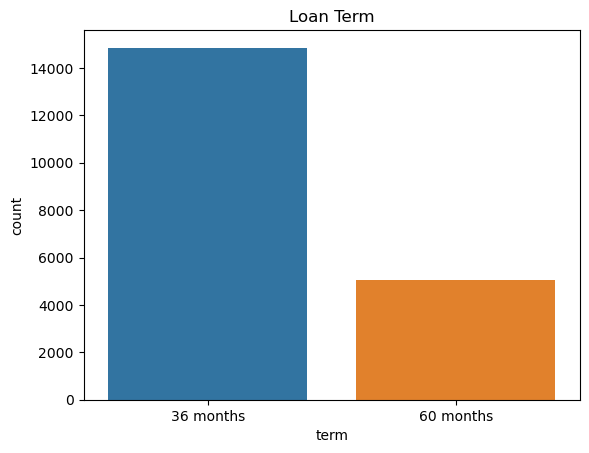

In [10]:
sns.countplot(x='term', data=loan_df, order=sorted(loan_df['term'].unique()))
plt.title('Loan Term')

**Interest Rate**

<Axes: >

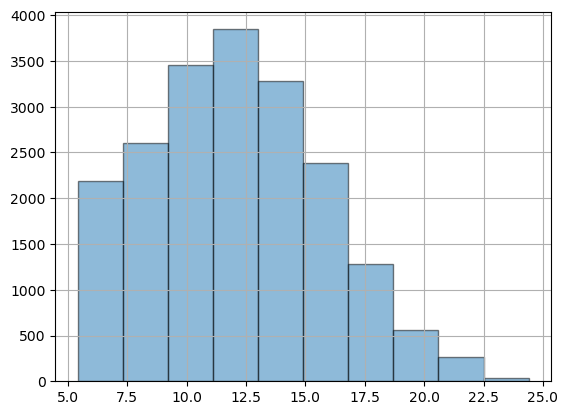

In [11]:
loan_df['int_rate'].hist(edgecolor='black', alpha=0.5)

**Loan terms and Interest rate**

In [12]:
# this command results in a series
loan_df.groupby('term')['int_rate'].mean()

term
36 months    11.121125
60 months    14.934955
Name: int_rate, dtype: float64

In [13]:
# this command results in a df
loan_df.groupby('term').agg({'int_rate':'mean'})

,int_rate
term,
36 months,11.121125
60 months,14.934955


Text(0, 0.5, 'Average Interest Rate')

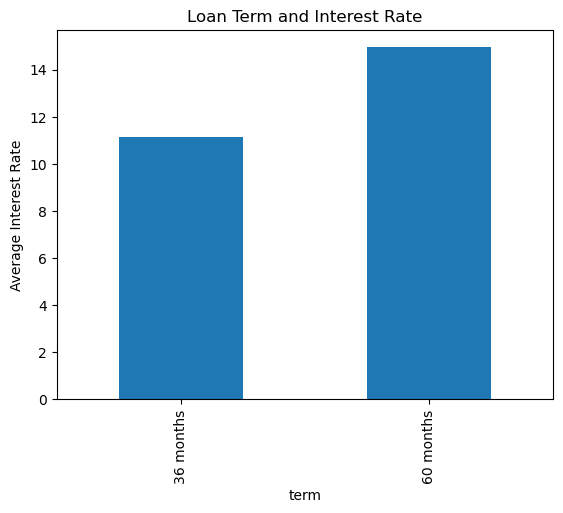

In [14]:
ax = loan_df.groupby('term').agg({'int_rate':'mean'}).plot.bar(legend = False)
ax.set_title('Loan Term and Interest Rate')
ax.set_ylabel('Average Interest Rate')

**__ Insights __**
- There are two different terms, 36 months and 60 months.
- There are about three times more 36 months loans than 60 months loans in the dataset.
- Interest rate is in the range of 5% to 25%. Majority of loans have interest rate between 5-17%.
- 36 months loans have significant lower average interest rate than that of 60 months loans.

## B2. Loan Grade and Interest Rate

**Loan Grade**

In [15]:
loan_df['grade'].value_counts()

grade
B    6065
A    4875
C    4087
D    2748
E    1434
F     540
G     159
Name: count, dtype: int64

<Axes: xlabel='grade', ylabel='count'>

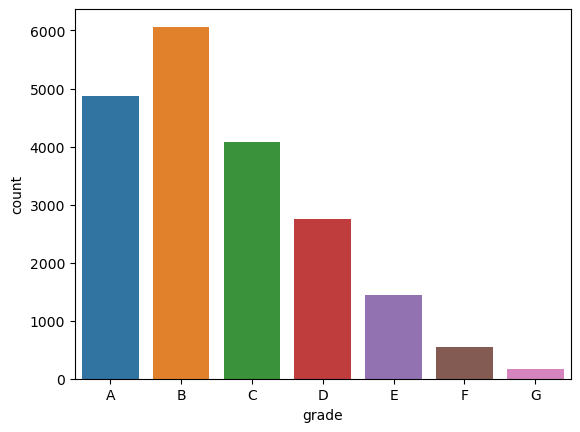

In [16]:
sns.countplot(x=loan_df['grade'], data=loan_df, order=sorted(loan_df['grade'].unique()))

**Loan Grade and Interest Rate**

In [17]:
loan_df.groupby('grade').agg({'int_rate':'mean'})

,int_rate
grade,
A,7.350978
B,11.033439
C,13.555241
D,15.707576
E,17.653752
F,19.729463
G,21.346981


Text(0, 0.5, 'Average Interest Rate')

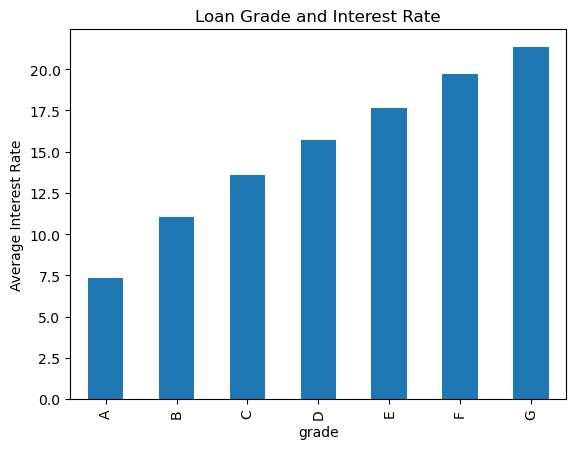

In [18]:
ax = loan_df.groupby('grade').agg({'int_rate':'mean'}).plot.bar(legend = False)
ax.set_title('Loan Grade and Interest Rate')
ax.set_ylabel('Average Interest Rate')

**__ Insights __**
- There are 7 loan grades (A - G)
- The top 3 loan grades are: B, A, C with grade B has the highest amount
- Average interest rate seems to be linear correlated to the Loan Grade, ascendingly
- Grade B loan has the average interest rate of 11.03, which is close to the overall interest rate mean 12.09

## B3. Loan by State

In [19]:
loan_df['addr_state'].value_counts()

addr_state
CA    7105
NY    3817
FL    2872
TX    2734
NJ    1855
IL    1525
Name: count, dtype: int64

Text(0.5, 0, 'State')

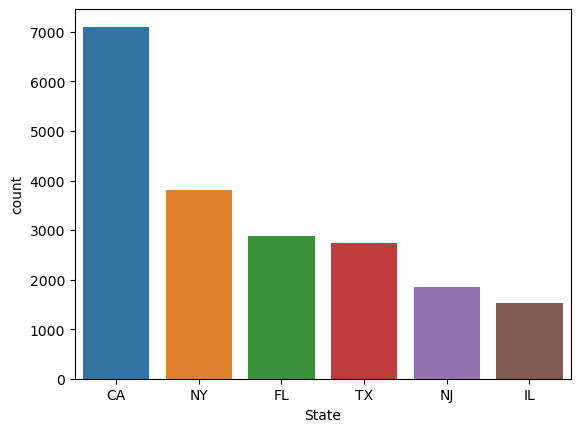

In [20]:
sns.countplot(x=loan_df['addr_state'], data=loan_df, order=loan_df['addr_state'].value_counts().index)
plt.xlabel('State')

**__ Insights __**
- most loan are generated from CA, which is nearly double from NY
- loan from CA and NY made up half of the total loan from all 6 states

## B4. Borrowers Annual Income Distribution

In [21]:
loan_df['annual_inc'].head(10)

0     12252
1     49200
2     48000
3     40000
4     15000
5     75000
6     15000
7    100000
8     42000
9     77385
Name: annual_inc, dtype: int64

<Axes: xlabel='annual_inc', ylabel='Density'>

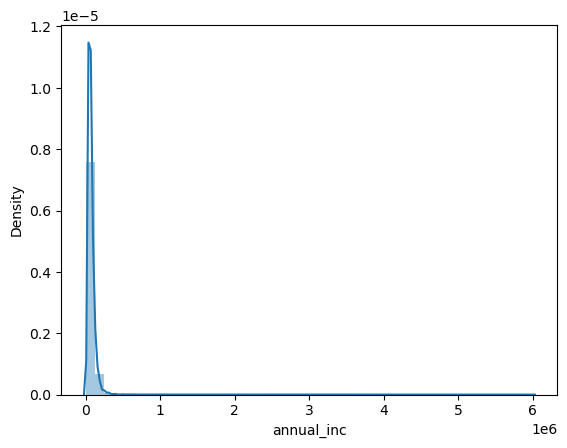

In [22]:
sns.distplot(loan_df['annual_inc'])

<Axes: >

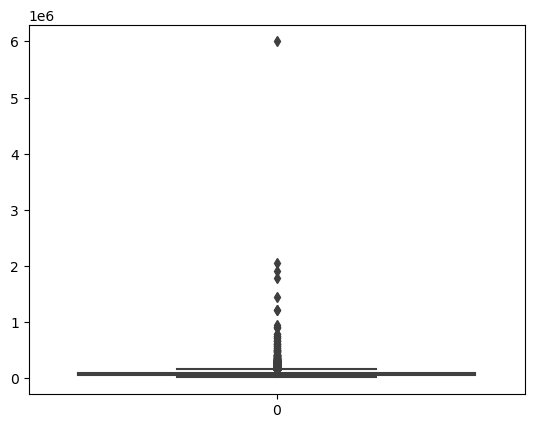

In [23]:
sns.boxplot(loan_df['annual_inc'])

array([[<Axes: title={'center': 'annual_inc'}>]], dtype=object)

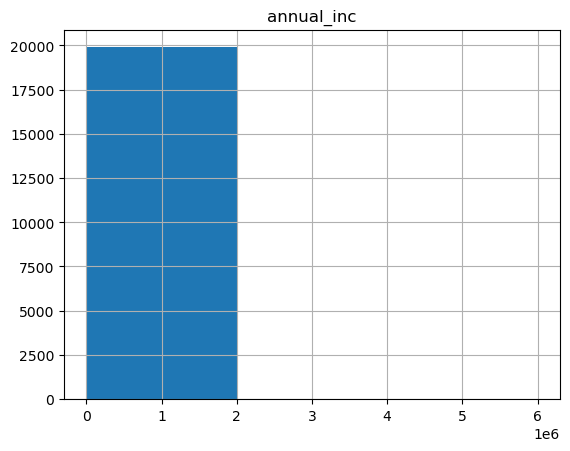

In [24]:
loan_df.hist(column='annual_inc', bins=3)

array([[<Axes: title={'center': 'annual_inc'}>]], dtype=object)

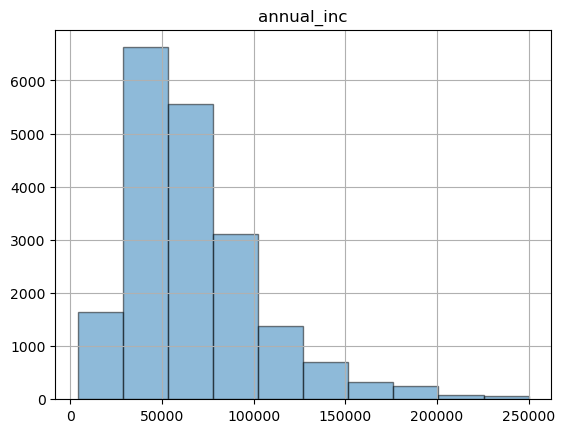

In [25]:
loan_df[loan_df['annual_inc'] < 250000].hist(column='annual_inc', edgecolor='black', alpha=0.5)

In [26]:
loan_df['annual_inc'].describe()

count    1.990800e+04
mean     7.107345e+04
std      6.980565e+04
min      4.000000e+03
25%      4.200000e+04
50%      6.000000e+04
75%      8.500000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

- The annual income follows a right-skewed distribtuion with a very long right tail.
- There are notable outliers on the right side, with the max annual income of 6M dollars
- The distribution mainly concentrates under 250k dollars

### B4.a. Borrower Annual Income by State

In [27]:
loan_df.groupby('addr_state').agg({'annual_inc':'median'})

,annual_inc
addr_state,
CA,60000.0
FL,53000.0
IL,59500.0
NJ,63000.0
NY,60000.0
TX,60000.0


Text(0, 0.5, 'Median Income')

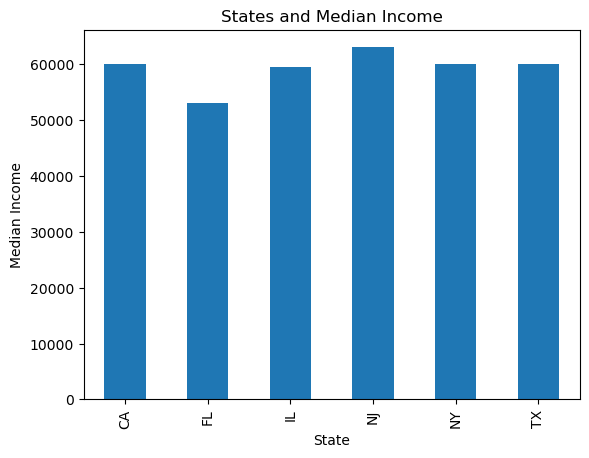

In [28]:
ax = loan_df.groupby('addr_state').agg({'annual_inc':'median'}).plot.bar(legend = False)
ax.set_title('States and Median Income')
ax.set_xlabel('State')
ax.set_ylabel('Median Income')

**__ Insights __**
- The median income across 6 states is similar, around 60k dollars
- Florida median income is the lowest, at 53k dollars

### B4.b. Annual Income and Interest Rate

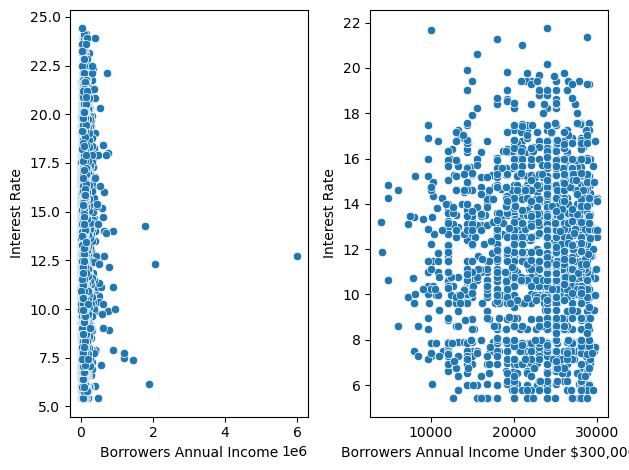

In [29]:
plt.subplot(121)
sns.scatterplot(data=loan_df, x='annual_inc', y='int_rate')
plt.xlabel('Borrowers Annual Income')
plt.ylabel('Interest Rate');

plt.subplot(122)
sns.scatterplot(data=loan_df[loan_df['annual_inc']<30000], x='annual_inc', y='int_rate')
plt.xlabel('Borrowers Annual Income Under $300,000')
plt.ylabel('Interest Rate')

plt.tight_layout()

**__ Insights __**
- It looks like there is no correlation between the borrowers' annual income and the interest rate

### B5. Loan Issued Over Year

Explore the number of loans issued through LendingClub from 2007-2011. 
- Count of loans in each year
- Count of loans by month 

**Issue Day Format**
- Convert the **issue_d** column to a datetime type
- Create a new column **issue_year** with the year extracted from 'issue_d'

In [30]:
loan_df['issue_d'].value_counts()
# the format is month-year

issue_d
Dec-11    1159
Nov-11    1111
Oct-11    1069
Sep-11    1068
Aug-11     974
Jul-11     895
Jun-11     877
May-11     830
Apr-11     768
Mar-11     717
Jan-11     694
Feb-11     652
Dec-10     625
Oct-10     588
Aug-10     577
Sep-10     542
May-10     523
Nov-10     523
Jul-10     523
Jun-10     513
Apr-10     417
Mar-10     380
Feb-10     346
Dec-09     327
Nov-09     308
Jan-10     304
Oct-09     275
Sep-09     237
Aug-09     198
Jun-09     181
Jul-09     177
May-09     155
Mar-09     136
Apr-09     129
Jan-09     124
Mar-08     120
Feb-09     116
Dec-08     104
Nov-08      97
Feb-08      85
Jan-08      83
Apr-08      79
Oct-08      48
Dec-07      41
Aug-08      41
Jul-08      38
May-08      36
Jun-08      27
Sep-08      22
Nov-07      13
Aug-07      13
Oct-07      10
Sep-07       7
Jul-07       6
Name: count, dtype: int64

In [31]:
loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'], format="%b-%y")
loan_df['issue_year'] = loan_df['issue_d'].dt.year

In [32]:
loan_df[["issue_d", "issue_year"]].head()

,issue_d,issue_year
0,2011-12-01,2011
1,2011-12-01,2011
2,2011-12-01,2011
3,2011-12-01,2011
4,2011-12-01,2011


In [33]:
loan_df.groupby("issue_year").agg({"term":"count"})

,term
issue_year,
2007,90
2008,780
2009,2363
2010,5861
2011,10814


<Axes: xlabel='issue_year', ylabel='count'>

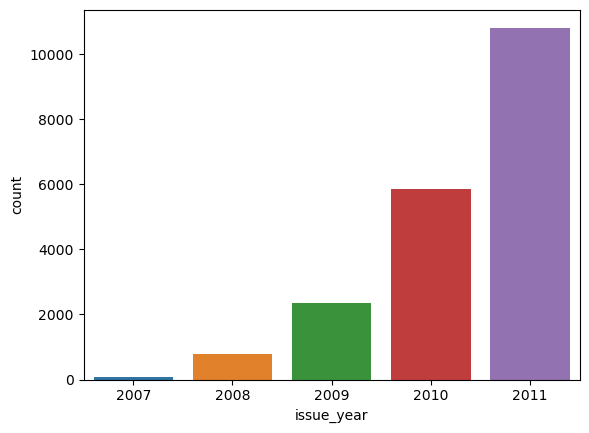

In [34]:
sns.countplot(x=loan_df['issue_year'], data=loan_df)

Text(0, 0.5, 'count')

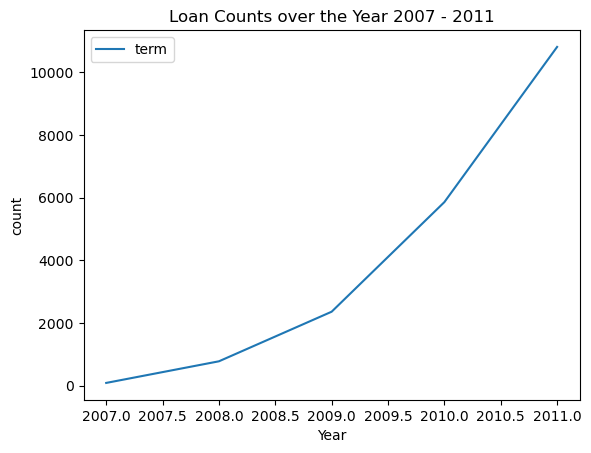

In [35]:
ax = loan_df.groupby("issue_year").agg({"term":"count"}).plot.line()
ax.set_title('Loan Counts over the Year 2007 - 2011')
ax.set_xlabel('Year')
ax.set_ylabel('count')

**__ Insights __**
- the amount of issued loans significantly increase over the range of 2007 - 2011
- loans in 2008 is 8x more than in 2007
- amount of loans increases 2x/year from 2009 to 2011

**Interest Rate Change in each State over Year**

In [36]:
year_state = pd.pivot_table(loan_df, index=["issue_year"],
                             columns=["addr_state"], values="int_rate",
                             aggfunc="median")

In [37]:
year_state

addr_state,CA,FL,IL,NJ,NY,TX
issue_year,,,,,,
2007,9.64,10.435,8.54,10.28,10.75,8.225
2008,11.34,10.960,11.14,11.31,11.31,10.995
2009,12.21,12.210,12.18,12.53,12.53,12.840
2010,11.86,11.360,11.49,12.23,11.86,11.490
2011,11.99,11.710,11.99,12.42,11.99,11.710


Text(0.5, 0, 'Issue Year')

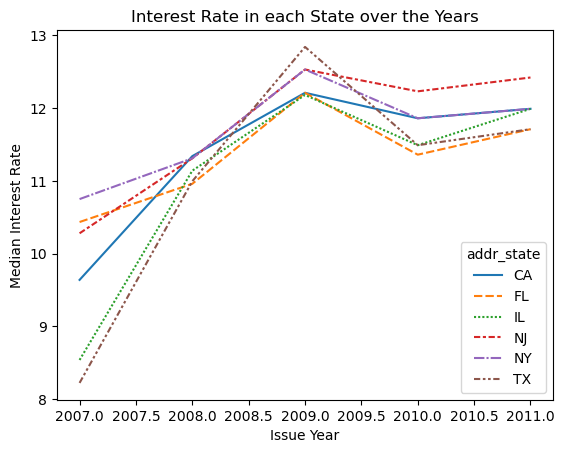

In [38]:
sns.lineplot(data=year_state)
plt.title('Interest Rate in each State over the Years')
plt.ylabel('Median Interest Rate')
plt.xlabel('Issue Year')

Text(0, 0.5, 'Median Interest Rate')

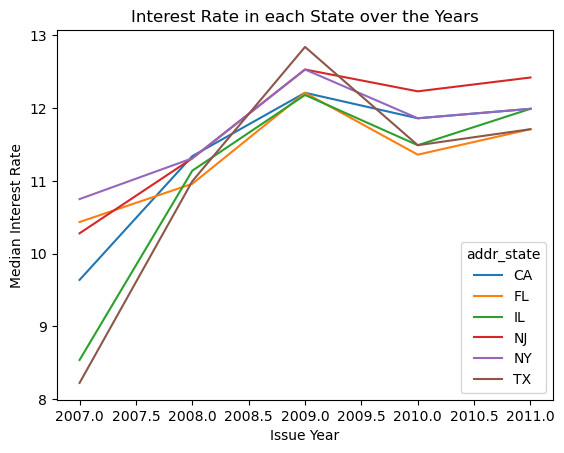

In [39]:
# or
ax = loan_df.pivot_table(index=["issue_year"],
                             columns=["addr_state"], values="int_rate",
                             aggfunc=np.median).plot.line()

ax.set_title('Interest Rate in each State over the Years')
ax.set_xlabel('Issue Year')
ax.set_ylabel('Median Interest Rate')

**__ Insights __**

The interest rate follows a same trend across the 6 states:
- The interest rate increased from 2007 and reached the peak at 2009
- Declined in 2010, and slowly increased in 2011

TX and IL had the steepest increase from 2007 - 2009
- TX: increased 2%/year in 2008 and 2009
- IL: increased 2% in 2008 and 1% in 2009

## B6. Loan Status

The loans in the dataset were issued before 2011 and the longest loan term is 5 years. So all the loans are either paid off or charged off (aka a loss) as of now, 2023

Explore loan status and find out:
- The number of paid off loans and charged off loans
- Paid off rate of the whole dataset.

$PaidOffRate = \frac{FullyPaid}{Fully Paid+Charged Off}$


In [40]:
loan_df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,issue_year
0,1,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252,Not Verified,2011-12-01,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.5,10,f,0,0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,Jun-17,0.0,NaN,1,Individual,0,0.0,0,0.0,0.0,N,Cash,N,NaN,2011
1,2,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,2011-12-01,Fully Paid,n,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21.0,37,f,0,0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,Individual,0,0.0,0,0.0,0.0,N,Cash,N,NaN,2011
2,3,3000,3000,3000.0,36 months,18.64,109.43,E,E1,MKC Accounting,9 years,RENT,48000,Source Verified,2011-12-01,Fully Paid,n,car,Car Downpayment,900xx,CA,5.35,0,Jan-07,2,NaN,NaN,4,0,8221,87.5,4,f,0,0,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.00,Jan-15,111.34,NaN,Dec-14,0.0,NaN,1,Individual,0,0.0,0,0.0,0.0,N,Cash,N,NaN,2011
3,4,5600,5600,5600.0,60 months,21.28,152.39,F,F2,NaN,4 years,OWN,40000,Source Verified,2011-12-01,Charged Off,n,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,0,Apr-04,2,NaN,NaN,11,0,5210,32.6,13,f,0,0,647.500000,647.50,162.02,294.94,0.00,190.54,2.09,Apr-12,152.39,NaN,Oct-16,0.0,NaN,1,Individual,0,0.0,0,0.0,0.0,N,Cash,N,NaN,2011
4,5,5375,5375,5350.0,60 months,12.69,121.45,B,B5,Starbucks,< 1 year,RENT,15000,Verified,2011-12-01,Charged Off,n,other,Building my credit history.,774xx,TX,18.08,0,Sep-04,0,NaN,NaN,2,0,9279,36.5,3,f,0,0,1484.590000,1477.70,673.48,533.42,0.00,277.69,2.52,Nov-12,121.45,NaN,Dec-16,0.0,NaN,1,Individual,0,0.0,0,0.0,0.0,N,Cash,N,NaN,2011


<Axes: xlabel='loan_status', ylabel='count'>

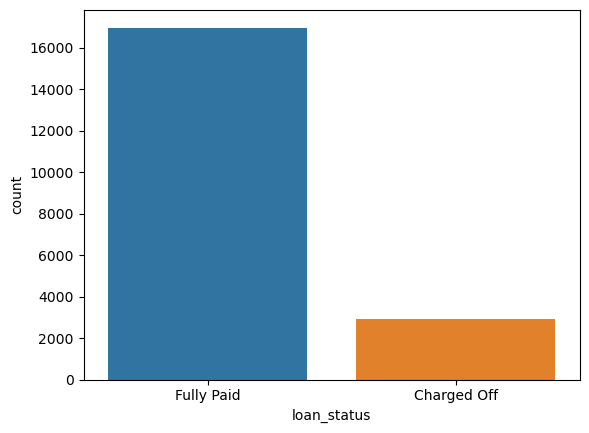

In [41]:
sns.countplot(x="loan_status", data=loan_df)

In [42]:
# Overall Paid off rate and Charged Off rate
loan_df['loan_status'].value_counts()/loan_df.shape[0]

loan_status
Fully Paid     0.85217
Charged Off    0.14783
Name: count, dtype: float64

### B6.a. Loan Term and Loan Status

In [43]:
pt_term = pd.pivot_table(loan_df, index=["term"],
                         columns=["loan_status"], values="int_rate",
                         aggfunc="count")
pt_term

loan_status,Charged Off,Fully Paid
term,,
36 months,1728,13124
60 months,1215,3841


In [44]:
pt_term['payoffRate'] = pt_term["Fully Paid"] / (pt_term["Fully Paid"] + pt_term["Charged Off"])
pt_term

loan_status,Charged Off,Fully Paid,payoffRate
term,,,
36 months,1728,13124,0.883652
60 months,1215,3841,0.759691


**__ Insights __**
- Overall payoff rate = 85.22%
- payoff rate in 3-year term is higher than 5-year term

### B6.b. Loan Grade and Loan Status

In [45]:
pt_grade = pd.pivot_table(loan_df, index=["grade"],
                         columns=["loan_status"], values="int_rate",
                         aggfunc="count")
pt_grade['payoffRate'] = pt_grade["Fully Paid"] / (pt_grade["Fully Paid"] + pt_grade["Charged Off"])
pt_grade

loan_status,Charged Off,Fully Paid,payoffRate
grade,,,
A,304,4571,0.937641
B,779,5286,0.871558
C,672,3415,0.835576
D,579,2169,0.789301
E,378,1056,0.736402
F,174,366,0.677778
G,57,102,0.641509


**__ Insights __**
- Recall: interest rate increase across A - G
- payoffRate decreases across loan grade A - G
- payoffRate - loan grade: negative correlation 

## B7. EDA Insights

The answers to the questions asked at the begining. 

**What is the goal of your analysis?**
The exploratory data anlysis is to find any correlations between features. I'm aiming to identify features impacting the lenders' decision. Generally, a lender is more comfortable with borrowers who pays on time and paid off previous loans

**What features have impact on whether a loan will be fully paid or charged off?**
- The loan is more likely to be fully paid if the interest rate is lower and with a 
- Current paid-off rate: 85.22%
- Current charged-off rate: 14.78%

---

# C. Data Preparation, Modeling and Model Evaluation

Questions:
1. What features should be selected for the classification model?
2. What data pre-processing techniques are for categorical features and what are for continuous features?
3. How does different class_weight affect a classification model?
4. What is the difference of precision and recall?


# C1. Data Processing


In [46]:
loan_df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,issue_year
0,1,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252,Not Verified,2011-12-01,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.5,10,f,0,0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,Jun-17,0.0,NaN,1,Individual,0,0.0,0,0.0,0.0,N,Cash,N,NaN,2011
1,2,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,2011-12-01,Fully Paid,n,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21.0,37,f,0,0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,Individual,0,0.0,0,0.0,0.0,N,Cash,N,NaN,2011
2,3,3000,3000,3000.0,36 months,18.64,109.43,E,E1,MKC Accounting,9 years,RENT,48000,Source Verified,2011-12-01,Fully Paid,n,car,Car Downpayment,900xx,CA,5.35,0,Jan-07,2,NaN,NaN,4,0,8221,87.5,4,f,0,0,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.00,Jan-15,111.34,NaN,Dec-14,0.0,NaN,1,Individual,0,0.0,0,0.0,0.0,N,Cash,N,NaN,2011
3,4,5600,5600,5600.0,60 months,21.28,152.39,F,F2,NaN,4 years,OWN,40000,Source Verified,2011-12-01,Charged Off,n,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,0,Apr-04,2,NaN,NaN,11,0,5210,32.6,13,f,0,0,647.500000,647.50,162.02,294.94,0.00,190.54,2.09,Apr-12,152.39,NaN,Oct-16,0.0,NaN,1,Individual,0,0.0,0,0.0,0.0,N,Cash,N,NaN,2011
4,5,5375,5375,5350.0,60 months,12.69,121.45,B,B5,Starbucks,< 1 year,RENT,15000,Verified,2011-12-01,Charged Off,n,other,Building my credit history.,774xx,TX,18.08,0,Sep-04,0,NaN,NaN,2,0,9279,36.5,3,f,0,0,1484.590000,1477.70,673.48,533.42,0.00,277.69,2.52,Nov-12,121.45,NaN,Dec-16,0.0,NaN,1,Individual,0,0.0,0,0.0,0.0,N,Cash,N,NaN,2011


**Create a target column: 'repaid' col**

The dataset has loans initiated from 2007 to 2011. All loans have been either fully paid or charged off. So we will create a `repaid` column in loan_df by encoding loan status and map:
- Charged Off to 0
- Fully Paid to 1.

The `repaid` column is the target column for the predictive model

In [47]:
loan_df["loan_status"].value_counts()

loan_status
Fully Paid     16965
Charged Off     2943
Name: count, dtype: int64

In [48]:
mapping_dict = {'Charged Off':0, 'Fully Paid':1}
loan_df['repaid'] = loan_df.loan_status.map(mapping_dict)
loan_df.repaid.value_counts()

repaid
1    16965
0     2943
Name: count, dtype: int64

In [49]:
# paid off rate:
print("Paid-off rate is: ", round(loan_df["repaid"].mean()*100,2))

Paid-off rate is:  85.22


**Loan Term in Year**

Create a new column `loan_term_year` in loan_df to encode:
- '36 months': 3 (int)
- '60 months': 5 (int)

In [50]:
# Create a colmn 'loan_term_year' to enconde '36 months' to 3
loan_df['loan_term_year'] = loan_df['term'].apply(lambda x: 3 if x == "36 months" else 5)

In [51]:
loan_df['term'].value_counts()

term
36 months    14852
60 months     5056
Name: count, dtype: int64

In [52]:
loan_df['loan_term_year'].value_counts()

loan_term_year
3    14852
5     5056
Name: count, dtype: int64

In [53]:
loan_df.groupby("loan_term_year").agg({"repaid": "mean"})

,repaid
loan_term_year,
3,0.883652
5,0.759691


### C1.a. Encode Categorical Features

Explore the relationship between following categorical features and repaid.
- purpose
- grade
- home_ownership
- addr_state

Then encode them with label encoding and create following new columns in loan_df.

- purpose_code
- grade_code
- home_ownership_code
- addr_state_code

Check if there are missing values in the newly created features.

We will demonstrate with purpose column.

First, we check repaid rate of loans with different purpose. Loans for small business has the lowest repaid rate and loans for cars and weddings have the highest repaid rate. We also count the number of each purpose. You may count any column in the dataset, here we count issue_d column. From the result, most loans in the dataset are for debt consolidation.

Then we label encode the purpose column to create purpose_code column.

Please complete the similar analysis on grade, home_ownership and addr_state.

In [54]:
#relationship between purpose and repaid rate
#issue_d is used to count the number of loans for each purpose
loan_df.groupby('purpose').agg({'repaid':'mean', 'issue_d':'count'}).sort_values(by='repaid')

,repaid,issue_d
purpose,,
small_business,0.728177,905
educational,0.801242,161
house,0.823864,176
moving,0.829653,317
other,0.843689,2060
debt_consolidation,0.845670,9389
medical,0.854286,350
vacation,0.859296,199
renewable_energy,0.862745,51


In [55]:
#relationship between purpose and repaid rate
loan_df.groupby('addr_state').agg({'repaid':'mean', 'issue_d':'count'}).sort_values(by='repaid')

,repaid,issue_d
addr_state,,
FL,0.822772,2872
CA,0.840816,7105
NJ,0.847978,1855
NY,0.868745,3817
IL,0.870164,1525
TX,0.882224,2734


In [56]:
# #encode purpose to create purpose_code
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# loan_df['purpose_code'] = le.fit_transform(loan_df.purpose)

In [57]:
cat_feat = loan_df[['purpose', "grade", "home_ownership", "addr_state"]]

In [58]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cat_feat:
    loan_df[col + "_code"] = le.fit_transform(loan_df[col])

In [59]:
loan_df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,issue_year,repaid,loan_term_year,purpose_code,grade_code,home_ownership_code,addr_state_code
0,1,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252,Not Verified,2011-12-01,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.5,10,f,0,0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,Jun-17,0.0,NaN,1,Individual,0,0.0,0,0.0,0.0,N,Cash,N,NaN,2011,1,3,11,2,4,2
1,2,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,2011-12-01,Fully Paid,n,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21.0,37,f,0,0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,Individual,0,0.0,0,0.0,0.0,N,Cash,N,NaN,2011,1,3,9,2,4,0
2,3,3000,3000,3000.0,36 months,18.64,109.43,E,E1,MKC Accounting,9 years,RENT,48000,Source Verified,2011-12-01,Fully Paid,n,car,Car Downpayment,900xx,CA,5.35,0,Jan-07,2,NaN,NaN,4,0,8221,87.5,4,f,0,0,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.00,Jan-15,111.34,NaN,Dec-14,0.0,NaN,1,Individual,0,0.0,0,0.0,0.0,N,Cash,N,NaN,2011,1,3,0,4,4,0
3,4,5600,5600,5600.0,60 months,21.28,152.39,F,F2,NaN,4 years,OWN,40000,Source Verified,2011-12-01,Charged Off,n,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,0,Apr-04,2,NaN,NaN,11,0,5210,32.6,13,f,0,0,647.500000,647.50,162.02,294.94,0.00,190.54,2.09,Apr-12,152.39,NaN,Oct-16,0.0,NaN,1,Individual,0,0.0,0,0.0,0.0,N,Cash,N,NaN,2011,0,5,11,5,3,0
4,5,5375,5375,5350.0,60 months,12.69,121.45,B,B5,Starbucks,< 1 year,RENT,15000,Verified,2011-12-01,Charged Off,n,other,Building my credit history.,774xx,TX,18.08,0,Sep-04,0,NaN,NaN,2,0,9279,36.5,3,f,0,0,1484.590000,1477.70,673.48,533.42,0.00,277.69,2.52,Nov-12,121.45,NaN,Dec-16,0.0,NaN,1,Individual,0,0.0,0,0.0,0.0,N,Cash,N,NaN,2011,0,5,9,1,4,5


### C1.b. Missing Values

- Fill missing values in `revol_util` with the mean value of the column in loan_df.
- Fill missing values in `pub_rec_bankruptcies` with 0 (which is the mode of the column) in loan_df.

In [60]:
loan_df[["revol_util", "pub_rec_bankruptcies"]].isnull().sum()/len(loan_df)

revol_util              0.000954
pub_rec_bankruptcies    0.015722
dtype: float64

In [61]:
loan_df['revol_util'] = loan_df['revol_util'].fillna(loan_df['revol_util'].mean())

In [62]:
loan_df['pub_rec_bankruptcies'] = loan_df['pub_rec_bankruptcies'].fillna(0)

<Axes: >

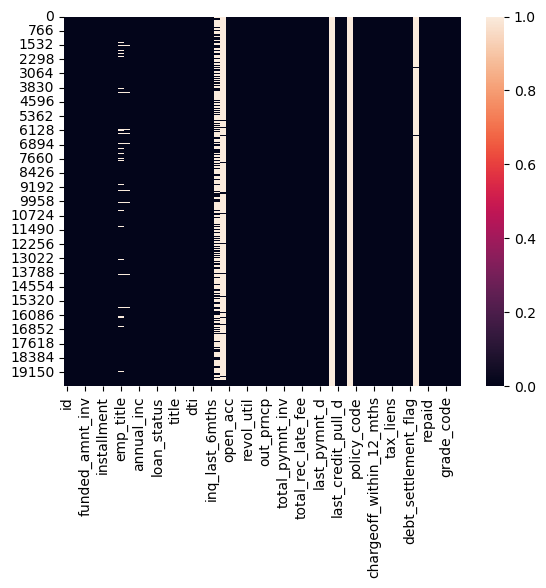

In [63]:
sns.heatmap(loan_df.isnull())

In [64]:
loan_df[["revol_util", "pub_rec_bankruptcies"]].isnull().sum()

revol_util              0
pub_rec_bankruptcies    0
dtype: int64

# D. Modeling and Model Evaluation

Construct a classification model to predict whether a loan will be fully paid. Column 'repaid' will be the label. The purpose of the model is to identify loans that are likely to be fully paid.

We will complete following steps:
- Identify columns we need for modeling and the next steps. 
- Create a clean DataFrame `df` with needed columns only.
- Split the DataFrame to train and test.
- Identify columns needed to train the classification model.
- Create train and test set for the classification model.
- Create train and test label for the classification model.
- Train the classification model.
- Predict with the classification model.
- Evaluate the classification model.

We will demonstrate these steps with RandomForestClassifier. You will need to complete a LogisticRegression model.

## D1. Identify relevant features

- Only features that are available **before the loan** is initiated can be used in the classification. 
- Features like recoveries, total_rec_prncp, which are *only available after the loan is closed, should not be included* in the training features.

Features to keep:
- funded_amnt
- loan_term_year
- int_rate
- grade_code
- purpose_code
- addr_state_code
- home_ownership_code
- annual_inc
- dti
- revol_util
- pub_rec_bankruptcies
- repaid
- total_pymnt: will be used to calculate portfolio return


In [65]:
#columns needed for the classification AND the next steps
# 12 features, 1 target
keep_columns = ['funded_amnt', 'loan_term_year', 'int_rate', 'grade_code', 'purpose_code', 
                'addr_state_code', 'home_ownership_code', 'annual_inc', 'dti', 'revol_util', 
                'pub_rec_bankruptcies', 'repaid', 'total_pymnt']

In [66]:
#Create a clean DataFrame
df = loan_df[keep_columns].copy()

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19908 entries, 0 to 19907
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   funded_amnt           19908 non-null  int64  
 1   loan_term_year        19908 non-null  int64  
 2   int_rate              19908 non-null  float64
 3   grade_code            19908 non-null  int64  
 4   purpose_code          19908 non-null  int64  
 5   addr_state_code       19908 non-null  int64  
 6   home_ownership_code   19908 non-null  int64  
 7   annual_inc            19908 non-null  int64  
 8   dti                   19908 non-null  float64
 9   revol_util            19908 non-null  float64
 10  pub_rec_bankruptcies  19908 non-null  float64
 11  repaid                19908 non-null  int64  
 12  total_pymnt           19908 non-null  float64
dtypes: float64(5), int64(8)
memory usage: 2.0 MB


## D2. Train and Test Split

For demonstration, we will use following features for the classification model:
- funded_amnt
- purpose_code
- addr_state_code
- home_ownership_code
- annual_inc
- dti
- revol_util
- pub_rec_bankruptcies


In [68]:
#columns for the classification
# 8 features
model_columns = ['funded_amnt', 'purpose_code', 'addr_state_code', 'home_ownership_code', 'annual_inc', 
                 'dti', 'revol_util', 'pub_rec_bankruptcies']

from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.4, random_state=23)

d_train = df_train[model_columns]
d_test = df_test[model_columns]
l_train = df_train.repaid
l_test = df_test.repaid

In [69]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11944 entries, 1907 to 8787
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   funded_amnt           11944 non-null  int64  
 1   loan_term_year        11944 non-null  int64  
 2   int_rate              11944 non-null  float64
 3   grade_code            11944 non-null  int64  
 4   purpose_code          11944 non-null  int64  
 5   addr_state_code       11944 non-null  int64  
 6   home_ownership_code   11944 non-null  int64  
 7   annual_inc            11944 non-null  int64  
 8   dti                   11944 non-null  float64
 9   revol_util            11944 non-null  float64
 10  pub_rec_bankruptcies  11944 non-null  float64
 11  repaid                11944 non-null  int64  
 12  total_pymnt           11944 non-null  float64
dtypes: float64(5), int64(8)
memory usage: 1.3 MB


In [70]:
d_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11944 entries, 1907 to 8787
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   funded_amnt           11944 non-null  int64  
 1   purpose_code          11944 non-null  int64  
 2   addr_state_code       11944 non-null  int64  
 3   home_ownership_code   11944 non-null  int64  
 4   annual_inc            11944 non-null  int64  
 5   dti                   11944 non-null  float64
 6   revol_util            11944 non-null  float64
 7   pub_rec_bankruptcies  11944 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 839.8 KB


In [72]:
l_train.info()

<class 'pandas.core.series.Series'>
Index: 11944 entries, 1907 to 8787
Series name: repaid
Non-Null Count  Dtype
--------------  -----
11944 non-null  int64
dtypes: int64(1)
memory usage: 186.6 KB


## D3. Compare the models

### D3.a. Random Forest Classifier

We will demonstrate the classification with two Random Forest Classifiers. The first one with default hpyerparameters and the second one with `class_weight='balanced'`. We set `random_state=23` in both classifiers just to ensure repeatability.

The first classifier achieve accuracy rate 83.5%, which is actually worse than the zero model. A zero model always predicts with the majority class, which is 1 in the dataset. Since the overal repaid rate is 85.2%, so the accuracy rate of the zero model is 85.2%.

In this project, **the accuracy rate is not what we are looking for**. The purpose of the classification model is to help us select loans that are more likely to be repaid. So our **focus is on the precision rate of class 1.** From the classification report of the first model, we can see that the precision rate of class 1 is 0.86, or 86%. This means among all the loans identified as to be fully paid by the classification model, 86% of them are actually fully paid. This is a not much better than the repaid rate of the whole test set, which is about 85%. The reason is that the model only has 0.07 recall rate on class 0, which means, for all loans that are charged off, the model only identifies 7% of them as charged off.

**The dataset is highly imbalanced**, with 85% class 1 and 15% class 0, we can achieve better class 1 precision by **setting balanced class_weight**. In the second model, we set `class_weight='balanced'`. The default RandomForestClassifier is not very senstive to class_weight change, so we also limit `max_depth` to increase the effectiveness of class_weight change.

From the classification report of the second Random Forest Classifier, we can see that even though the accuracy rate drops to 65%, the model has a lot larger class 0 recall at 0.44. It means the model identifies 44% of all charged off loans correctly. More importantly, we get better class 1 precission, 88%, which means, among all loans that are predicted as to be fully paid by the model, 88% of them are actually fully paid.

You can also see the prediction details from the confusion matrix.

**Random Forest Classifier with Default Class Weight**

In [73]:
#zero model accuracy
df_test.repaid.mean()

0.8510798593671521

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Create Regressor with default properties
rfc1 = RandomForestClassifier(random_state=23)

# Fit estimator and display score
rfc1 = rfc1.fit(d_train, l_train)
print(f'Accuracy Score: {rfc1.score(d_test, l_test)}')

# Predict on the test set
pred = rfc1.predict(d_test)
print(f'Confusion Matrix:\n{metrics.confusion_matrix(l_test, pred)}')
print(f'Classification Report:\n{metrics.classification_report(l_test, pred)}')

Accuracy Score: 0.8496986438975389
Confusion Matrix:
[[   9 1177]
 [  20 6758]]
Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.01      0.01      1186
           1       0.85      1.00      0.92      6778

    accuracy                           0.85      7964
   macro avg       0.58      0.50      0.47      7964
weighted avg       0.77      0.85      0.78      7964



**Random Forest Classifier with Balanced Class Weight**

In [76]:
rfc2 = RandomForestClassifier(max_depth=7, class_weight='balanced', random_state=23)

# Fit estimator and display score
rfc2 = rfc2.fit(d_train, l_train)
print(f'Accuracy Score: {rfc2.score(d_test, l_test)}')

# Predict on the test set
pred = rfc2.predict(d_test)
print(f'Confusion Matrix:\n{metrics.confusion_matrix(l_test, pred)}')
print(f'Classification Report:\n{metrics.classification_report(l_test, pred)}')

Accuracy Score: 0.6761677548970366
Confusion Matrix:
[[ 535  651]
 [1928 4850]]
Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.45      0.29      1186
           1       0.88      0.72      0.79      6778

    accuracy                           0.68      7964
   macro avg       0.55      0.58      0.54      7964
weighted avg       0.78      0.68      0.72      7964



### D3.b. Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression

**Logistic Regression with Default Class Weight**

In [78]:
# Create Regressor with default properties
log1 = LogisticRegression(random_state=23)

# Fit estimator and display score
log1 = log1.fit(d_train, l_train)
print(f'Accuracy Score: {log1.score(d_test, l_test)}')

# Predict on the test set
pred = log1.predict(d_test)
print(f'Confusion Matrix:\n{metrics.confusion_matrix(l_test, pred)}')
print(f'Classification Report:\n{metrics.classification_report(l_test, pred)}')

Accuracy Score: 0.8510798593671521
Confusion Matrix:
[[   0 1186]
 [   0 6778]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1186
           1       0.85      1.00      0.92      6778

    accuracy                           0.85      7964
   macro avg       0.43      0.50      0.46      7964
weighted avg       0.72      0.85      0.78      7964



- The accuracy and the precision rate of class 1 is 0.86, which is a not much better than the zero model. 
- The recall rate on class 0 is 0.00, which is very terrible. 

### Task 2.5: Logistic Regression with Balanced Class Weight

Construct a Logistic Regression model with `class_weight='balanced'`. Train and evaluate the model.

Use the same features as the first LogisticRegression model.

How does the accuracy score change?  
What about class 1 precision and class 0 recall?  
Is this model a better choice in selecting loan portfolio?

In [79]:
log2 = RandomForestClassifier(max_depth=7, class_weight='balanced', random_state=23)

# Fit estimator and display score
log2 = log2.fit(d_train, l_train)
print(f'Accuracy Score: {log2.score(d_test, l_test)}')

# Predict on the test set
pred = log2.predict(d_test)
print(f'Confusion Matrix:\n{metrics.confusion_matrix(l_test, pred)}')
print(f'Classification Report:\n{metrics.classification_report(l_test, pred)}')

Accuracy Score: 0.6761677548970366
Confusion Matrix:
[[ 535  651]
 [1928 4850]]
Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.45      0.29      1186
           1       0.88      0.72      0.79      6778

    accuracy                           0.68      7964
   macro avg       0.55      0.58      0.54      7964
weighted avg       0.78      0.68      0.72      7964



- The accuracy score is much lower than the zero model
- The precision rate of class 1 is 0.88 (> 0.85)
- The recall rate on class 0 is 0.45, which is a significant improvement to be able to identifies 45% of all charged off loans correctly

---

## Module 3: Construct Loan Portfolio

Construct a *loan portfolio* out of **the test set** with the help of your classification model. The portfolio can be a small subset of all loans in the dataset, for example, 50% of all loans in the test set.

- Predict on the test set with the trained model.
- Select loans that are predicted to be paid off by the model.
- Calculate annual return of selected loans.

We will demonstrate how to select portfolio with RandomForestClassifier. You will need to construct a portfolio with the Logistic Regression model.

### Portfolio Annual Return

Calculation of loan return is very complicated since the loan is paid by monthly installments. In this project, we simplify the calculation by using the total payment and funded amount. We can use following formula to calculate the total return:

$TotalReturn = \frac{Total Payment}{Funded Amount} - 1$

The total return doesn't reflect loan profitability since loans have different terms. It's more accurate to compare annual returns. There are only two terms in the dataset, 36 months and 60 months. The formula to calculate annual return is:

$Annualized Return = (1+Total Return)^{(1/years)} - 1$. 

For example, if total return of a 36 month loan is 10%, then annualized return = `(1 + 0.1)**(1/3) - 1` = `0.032`.

Again, this is not the true annualized return of a loan. But **the goal** of this project is to **identify loans to invest**, so we just need a benchmark to **evaluate loan portfolio performance**.

In the following code cells, we define a function to calculate annual return of a loan portfolio. The function calculates annual return for 36 month and 60 month loans in a portfolio separately. 

Then we use the `get_portfolio_annual_return()` function to find out the annual returns of all 36 months and 60 months loans in the test dataset. There are 5960 36 months loans, with annual return 2.69%, and 2004 60 months loans, with annual return 2.74%.

**Please make sure all above code cells are executed before moving on.**

In [80]:
def get_portfolio_annual_return(df):
    '''
    Get annual return of 36 and 60 month loans in the portfolio df.
    '''
    annual_return_36, annual_return_60 = 0, 0
    df_36 = df[df.loan_term_year==3]
    if(len(df_36)>0):
        return_36 = df_36.total_pymnt.sum()/df_36.funded_amnt.sum()-1
        annual_return_36 = (1+return_36)**(1/3)-1
    df_60 = df[df.loan_term_year==5]
    if(len(df_60)>0):
        return_60 = df_60.total_pymnt.sum()/df_60.funded_amnt.sum()-1
        annual_return_60 = (1+return_60)**(1/5)-1
    print (f'36 months loan:{len(df_36)}, Annual return:{round(annual_return_36, 4)}')
    print (f'60 months loan:{len(df_60)}, Annual return:{round(annual_return_60, 4)}')

In [81]:
#get current annual return of the test set
get_portfolio_annual_return(df_test)

36 months loan:5960, Annual return:0.0269
60 months loan:2004, Annual return:0.0274


### Construct Loan Portfolio with RandomForestClassifier

We will use the RandomForestClassifier model with `class_weight='balanced'` (rfc2) to select loans from the test set. Then we will compare the annual return of *the selected loans* with that of *the test set*. 

In [85]:
# keep_columns = ['funded_amnt', 'loan_term_year', 'int_rate', 'grade_code', 'purpose_code', 
#                 'addr_state_code', 'home_ownership_code', 'annual_inc', 'dti', 'revol_util', 
#                 'pub_rec_bankruptcies', 'repaid', 'total_pymnt']

# df = loan_df[keep_columns].copy()

# model_columns = ['funded_amnt', 'purpose_code', 'addr_state_code', 'home_ownership_code', 'annual_inc', 
#                  'dti', 'revol_util', 'pub_rec_bankruptcies']

# from sklearn.model_selection import train_test_split
# df_train, df_test = train_test_split(df, test_size=0.4, random_state=23)
# d_train = df_train[model_columns]
# d_test = df_test[model_columns]
# l_train = df_train.repaid
# l_test = df_test.repaid

rfc2 = RandomForestClassifier(max_depth=7, class_weight='balanced', random_state=23)
rfc2 = rfc2.fit(d_train, l_train)
pred = rfc2.predict(d_test)

# create prediction column in the test set.
df_test['prediction'] = pred

# select loans with a predicted labe "1" : predicted paidoff
portfolio_rfc2 = df_test[df_test.prediction==1]

In [86]:
portfolio_rfc2.sample(20)

,funded_amnt,loan_term_year,int_rate,grade_code,purpose_code,addr_state_code,home_ownership_code,annual_inc,dti,revol_util,pub_rec_bankruptcies,repaid,total_pymnt,prediction
14054,7000,3,11.86,1,9,0,3,24000,1.20,14.9,0.0,0,3476.430000,1
11188,5275,5,18.54,5,1,0,4,90000,15.85,88.0,0.0,1,7491.014820,1
17153,9000,3,15.31,3,2,4,4,44482,6.74,60.7,0.0,1,9596.192250,1
2764,7000,3,14.65,2,4,0,3,130000,8.26,62.8,0.0,0,3646.890000,1
12154,9000,3,13.35,2,1,1,0,57000,12.32,45.8,0.0,1,10185.067760,1
6741,10000,3,5.42,0,2,0,0,60000,7.02,16.0,0.0,1,10700.695930,1
919,16000,5,15.27,2,2,4,4,99000,7.76,56.6,0.0,1,22965.280000,1
15775,2500,3,14.59,3,2,0,0,52000,13.11,71.2,0.0,1,3086.516548,1
8621,11000,5,12.68,2,2,5,3,40000,11.85,35.4,0.0,1,14087.728090,1
723,17200,5,20.89,5,5,1,4,52000,7.06,96.4,0.0,1,27885.220020,1


In [87]:
df_test['repaid'].mean()

0.8510798593671521

In [88]:
portfolio_rfc2['repaid'].mean()

0.8816578803853845

In [84]:
# total loans (both 36-m and 60-m terms)
len(df_test)

7964

In [89]:
get_portfolio_annual_return(df_test)

36 months loan:5960, Annual return:0.0269
60 months loan:2004, Annual return:0.0274


In [97]:
print("The number of loans that is predicted to be fully paid off :", len(portfolio_rfc2))

The number of loans that is predicted to be fully paid off : 5501


In [90]:
#return of the loan portfolio selected by rfc2
get_portfolio_annual_return(portfolio_rfc2)

36 months loan:4223, Annual return:0.0295
60 months loan:1278, Annual return:0.0306


**Findings**

The RandomForestClassifier mode selects 
- 4223 loans from 5960 36 months loans, with annual return 2.95%
- 1278 loans from 2004 60 months loans, with annual return 3.06% 

The portfolio achieves better return on both 36 months loans and 60 months loans comparing to the whole test set, which are 2.69% and 2.74% respectively.


### Impact of Loan Term

In the RandomForestClassifier demo, we don't include loan term in the training features. But as shown in task 2.1, *36 months loans have much higher paid-off rate than that of 60 months loans*. It seems obvious that **loan term should be included in the training feature**.

In the following code cells, we will add loan_term_year to the training feature and train the RandomForestClassifier with class_weight='balanced'.

- First, we add loan_term_year to model_columns.
- Then, we create d_train with the new model_columns.
- Then, we train and predict with the RandomForestClassifier.
- Fianlly, we check the portfolio return.

In [91]:
# On the original dataset
#check repaid rate of 36 months loans and 60 months loans
loan_df.groupby('loan_term_year').agg({'repaid':'mean'})

,repaid
loan_term_year,
3,0.883652
5,0.759691


In [92]:
df_test.head()

,funded_amnt,loan_term_year,int_rate,grade_code,purpose_code,addr_state_code,home_ownership_code,annual_inc,dti,revol_util,pub_rec_bankruptcies,repaid,total_pymnt,prediction
13202,15000,5,13.98,2,2,3,0,125000,15.35,80.9,0.0,1,20932.049350,1
3985,17625,5,10.59,1,2,5,0,81000,11.19,42.2,0.0,1,22271.449980,1
8230,7000,3,7.29,0,9,4,0,150000,19.54,83.1,0.0,1,7622.612042,1
6112,7000,3,5.99,0,2,5,4,35000,10.80,2.9,0.0,1,7508.402271,1
12496,2000,3,13.23,2,9,2,4,24702,15.06,97.2,0.0,1,2434.304765,0


In [93]:
# Add loan_term_year to training feature
model_columns2 = ['funded_amnt', 'purpose_code', 'addr_state_code', 'home_ownership_code', 'annual_inc', 
                 'dti', 'revol_util', 'pub_rec_bankruptcies', 'loan_term_year']
d_train = df_train[model_columns2]
d_test = df_test[model_columns2]

# Train RandomForestClassifier with new features
rfc3 = RandomForestClassifier(max_depth=7, class_weight='balanced', random_state=23)
rfc3 = rfc3.fit(d_train, l_train)
pred = rfc3.predict(d_test)

# Create portfolio and check return
# replace the predicted results of rfc2 with rfc3's
df_test['prediction'] = pred

# select loans with a predicted labe "1" : predicted paidoff
portfolio_rfc3 = df_test[df_test.prediction==1]

#return of the loan portfolio selected by rfc3
get_portfolio_annual_return(portfolio_rfc3)

36 months loan:5226, Annual return:0.0278
60 months loan:404, Annual return:0.0331


In [94]:
# portfolio results from rfc2
get_portfolio_annual_return(portfolio_rfc2)

36 months loan:4223, Annual return:0.0295
60 months loan:1278, Annual return:0.0306


In [95]:
# portfolio results from df_test
get_portfolio_annual_return(df_test)

36 months loan:5960, Annual return:0.0269
60 months loan:2004, Annual return:0.0274


In [99]:
#Check number of 36 months and 60 months loans
portfolio_rfc3["loan_term_year"].value_counts()

loan_term_year
3    5226
5     404
Name: count, dtype: int64

Comparing to the portfolio selected by rfc2, in the new portfolio (rfc3):
- 36 months loan return drops a bit
- 60 months loan return increases a bit. 

Take a look at the number of loans in each term.

But the biggest impact is that in the rfc3 portfolio, there are 10 times more 36 months loans than 60 months loans. While in the dataset, the ratio is about 3 to 1. The reason is that since 36 months loans have much higher repaid rate, when we set class_weight='balanced', the model will bias toward 36 months loans.

### Improvements with Filters

pub_rec_bankruptcies is the number of public record bankruptcies of a loan borrower. As show in the next code cell, vast majority of loans have pub_rec_bankruptcies = 0, which means no public record of bankruptcies.


In [100]:
df['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    19165
1.0      742
2.0        1
Name: count, dtype: int64

We may **include pub_rec_bankruptcies** in the training features. Another way is to use it **as a filter**. In the next code cell, we check returns of loans *with and without public record bankruptcies in the data set*.

On the *original dataset*:

In [101]:
#returns of loans without bankruptcy record
get_portfolio_annual_return(loan_df[loan_df.pub_rec_bankruptcies==0])

# notice this is on all the loans without bankruptcy, not selected "1" loans

36 months loan:14316, Annual return:0.029
60 months loan:4849, Annual return:0.029


In [103]:
14316+4849

19165

In [104]:
#returns of loans with bankruptcy record
get_portfolio_annual_return(loan_df[loan_df.pub_rec_bankruptcies>0])

36 months loan:536, Annual return:0.0156
60 months loan:207, Annual return:0.0198


Since **loans without public bankruptcies recrods have significantly higher returns**, we *may filter out all loans that have public bankruptcies recrods* from the portfolio determined by rfc2. The new portfolio has a little better return as shown in the following code cell.

In [106]:
portfolio_rfc2.head()

,funded_amnt,loan_term_year,int_rate,grade_code,purpose_code,addr_state_code,home_ownership_code,annual_inc,dti,revol_util,pub_rec_bankruptcies,repaid,total_pymnt,prediction
13202,15000,5,13.98,2,2,3,0,125000,15.35,80.9,0.0,1,20932.049350,1
3985,17625,5,10.59,1,2,5,0,81000,11.19,42.2,0.0,1,22271.449980,1
8230,7000,3,7.29,0,9,4,0,150000,19.54,83.1,0.0,1,7622.612042,1
6112,7000,3,5.99,0,2,5,4,35000,10.80,2.9,0.0,1,7508.402271,1
14917,13000,5,17.93,4,1,5,0,43200,20.67,52.6,0.0,1,13194.764580,1


In [107]:
portfolio_rfc2_no_prb = portfolio_rfc2[portfolio_rfc2.pub_rec_bankruptcies==0]
get_portfolio_annual_return(portfolio_rfc2_no_prb)

36 months loan:4078, Annual return:0.0299
60 months loan:1219, Annual return:0.0319


### Task 3.1: Construct Loan Portfolio with Logistic Regression Model

Construct a loan portfolio with the Logistic Regression model with `class_weight='balanced'`.

Train your model twice, first without loan_term_year in the training feature, then with. Compare the two portfolios.

#### Your Code

### Impact of Loan Grade

Loan grade is assigned by Lending Club based on loan and borrower's information. Higher grade loans have higher repaid rate. On the other hand, higher grader loans also have lower interest rate. Portfolio return is determined by both repaid rate and interest rate. As shown in following code cells, a portfolio with all grade A loans actually have lower annual return for both 36 months loans and 60 months loans comparing to the whole dataset.

In [113]:
loan_df.groupby('grade').agg({'repaid': 'mean', 'int_rate': 'mean'})

# A - G : 0 - 6

,repaid,int_rate
grade,,
A,0.937641,7.350978
B,0.871558,11.033439
C,0.835576,13.555241
D,0.789301,15.707576
E,0.736402,17.653752
F,0.677778,19.729463
G,0.641509,21.346981


In [108]:
#Higher grade loans have higher repaid rate
df.groupby('grade_code').agg({'repaid':'mean'})

,repaid
grade_code,
0,0.937641
1,0.871558
2,0.835576
3,0.789301
4,0.736402
5,0.677778
6,0.641509


In [112]:
#Higher grade loans have lower interest rate
df.groupby('grade_code').agg({'int_rate':'mean'})

,int_rate
grade_code,
0,7.350978
1,11.033439
2,13.555241
3,15.707576
4,17.653752
5,19.729463
6,21.346981


In [114]:
#All grade A loans
get_portfolio_annual_return(df_test[df_test.grade_code==0])

36 months loan:1842, Annual return:0.0226
60 months loan:76, Annual return:0.0225


### Task 3.2: Include Loan Grade in Training Features

Add grade_code to model_columns and train the LogisticRegression model with class_weight='balanced'. Compare the portfolio selected by the new model. Does the portfolio have better or worse return? Try explian the reason.

**Hint:** Check counts of loans in different grades and compare with the count of the portfolio created without grade_code.

#### Your Code

### Task 3.3: More Extreme class_weight

'balanced' class weight set weights inversely proportional to class frequencies in the input data. In the dataset, about 85% of loans are paid off, or class 1. So 'balanced' class weight is roughly equivalent to set `class_weight={0:0.85, 1:0.15}`.

Try set more extreme class weight than 'balanced', ie. {0:0.9, 1:0.1}. How does this change affect the portfolio?

#### Your Code

### Task 3.4: Other Improvements

As shown above, filtering out loans from borrowers with previous public record bankruptcies will improve the portfolio return. Can you find out other filters that help the portfolio performance?

What is the best return your can get?

#### Your Code